In [ ]:
# importing the required libraries

import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Reading and displaying a cat image:

cat4 = cv2.imread('../DATA/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

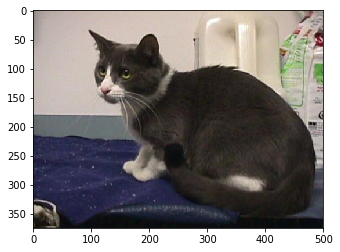

In [ ]:
plt.imshow(cat4)

In [ ]:
cat4.shape

(375, 500, 3)

In [ ]:
type(cat4)

numpy.ndarray

In [ ]:
# Reading and displaying a dog image:

dog2 = cv2.imread('../DATA/CATS_DOGS/train/DOG/2.jpg')
dog2 = cv2.cvtColor(dog2, cv2.COLOR_BGR2RGB)

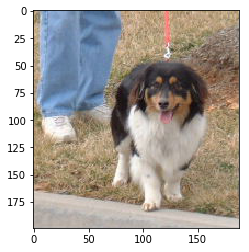

In [ ]:
plt.imshow(dog2)

In [ ]:
dog2.shape

(199, 188, 3)

In [ ]:
type(dog2)

numpy.ndarray

In [ ]:
# Preprocessing data:

from keras.preprocessing.image import ImageDataGenerator


In [ ]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

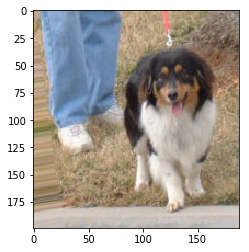

In [ ]:
plt.imshow(image_gen.random_transform(dog2))

In [ ]:
# importing the required libraries

from keras.models import Sequential
from keras.layers import Dense,Activation, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

# Convolution Layer
model.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape = (150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = (150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), input_shape = (150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)             0         
__________

In [ ]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/train', 
                                                target_size=(150,150),
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory('../DATA/CATS_DOGS/test', 
                                                target_size=(150,150),
                                                batch_size = batch_size,
                                                class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}